In [6]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
import time
from datasets.datasets import *
from GAN.CycleGAN import *
from visualize import *
%matplotlib inline
%matplotlib notebook

In [7]:
#SETTINGS
name = "jupyter"
learning_rate = 5e-7
batch_size = 4
epochs = 200
e_decay = 100
g_layers = 6
d_layers = 4
adv = 1
cyc = 10
idt = 0.5
savefreq = 0.5
setX = "landscape"
setY = "monet"

args = {
    "name": name,
    "lr": learning_rate,
    "batch": batch_size,
    "epochs": epochs,
    "glayers": g_layers,
    "dlayers": d_layers,
    "adv_coeff": adv,
    "cyc_coeff": cyc,
    "idt_coeff": idt,
    "setX": setX,
    "setY": setY,
}

In [3]:
#DATASET
dataset = Dataset(setX, setY)
dataloader = dataset.get_loader(batch_size, shuffle=True)
print(len(dataset))

1072


In [4]:
#MODEL, DEVICE
device = torch.device("cuda")
gan = cycleGAN(device, lr=learning_rate, g_layers = g_layers, d_layers = d_layers,
               coeff_adv = adv,
               coeff_forward=cyc,
               coeff_backward=cyc,
               coeff_idt = idt)
gan.to(device);

<IPython.core.display.Javascript object>


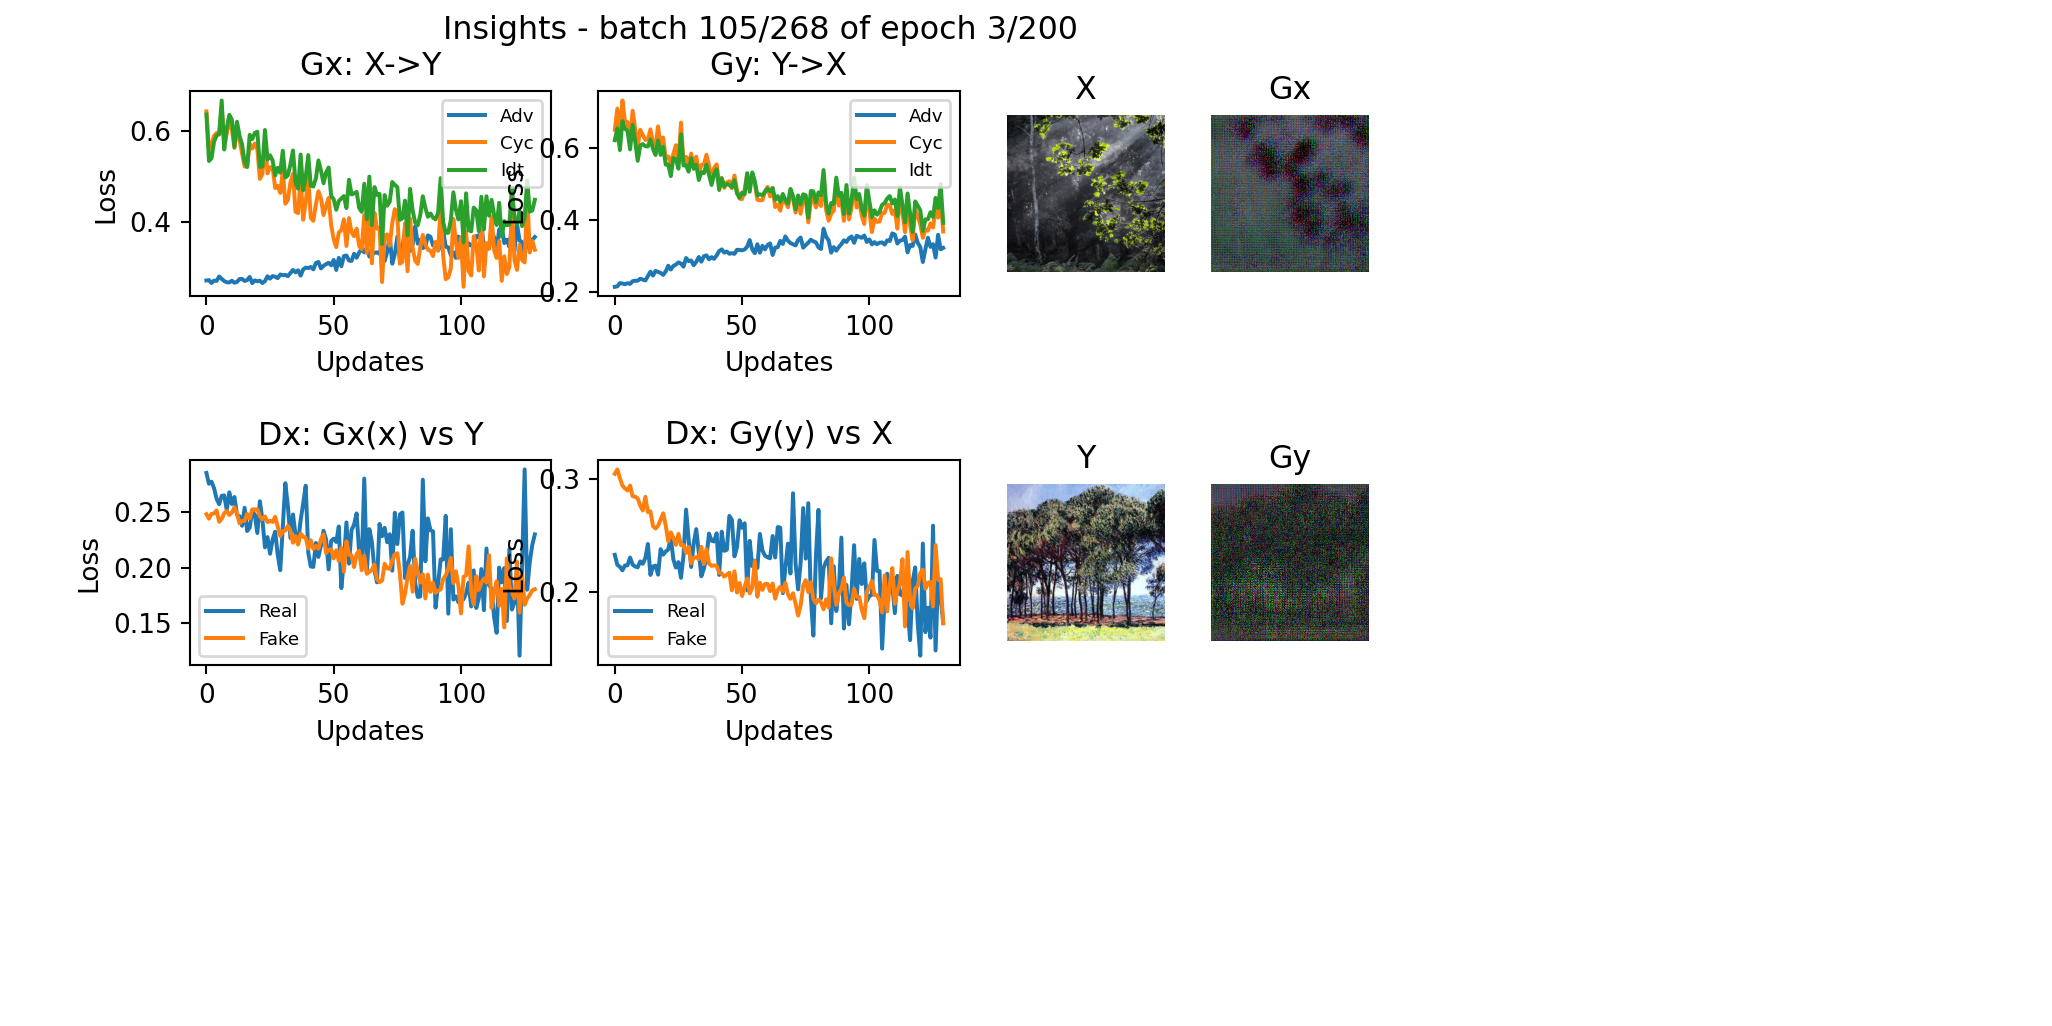

deleted models/jupyter
created models/jupyter
models/jupyter/e0b125/samples.png


<IPython.core.display.Javascript object>


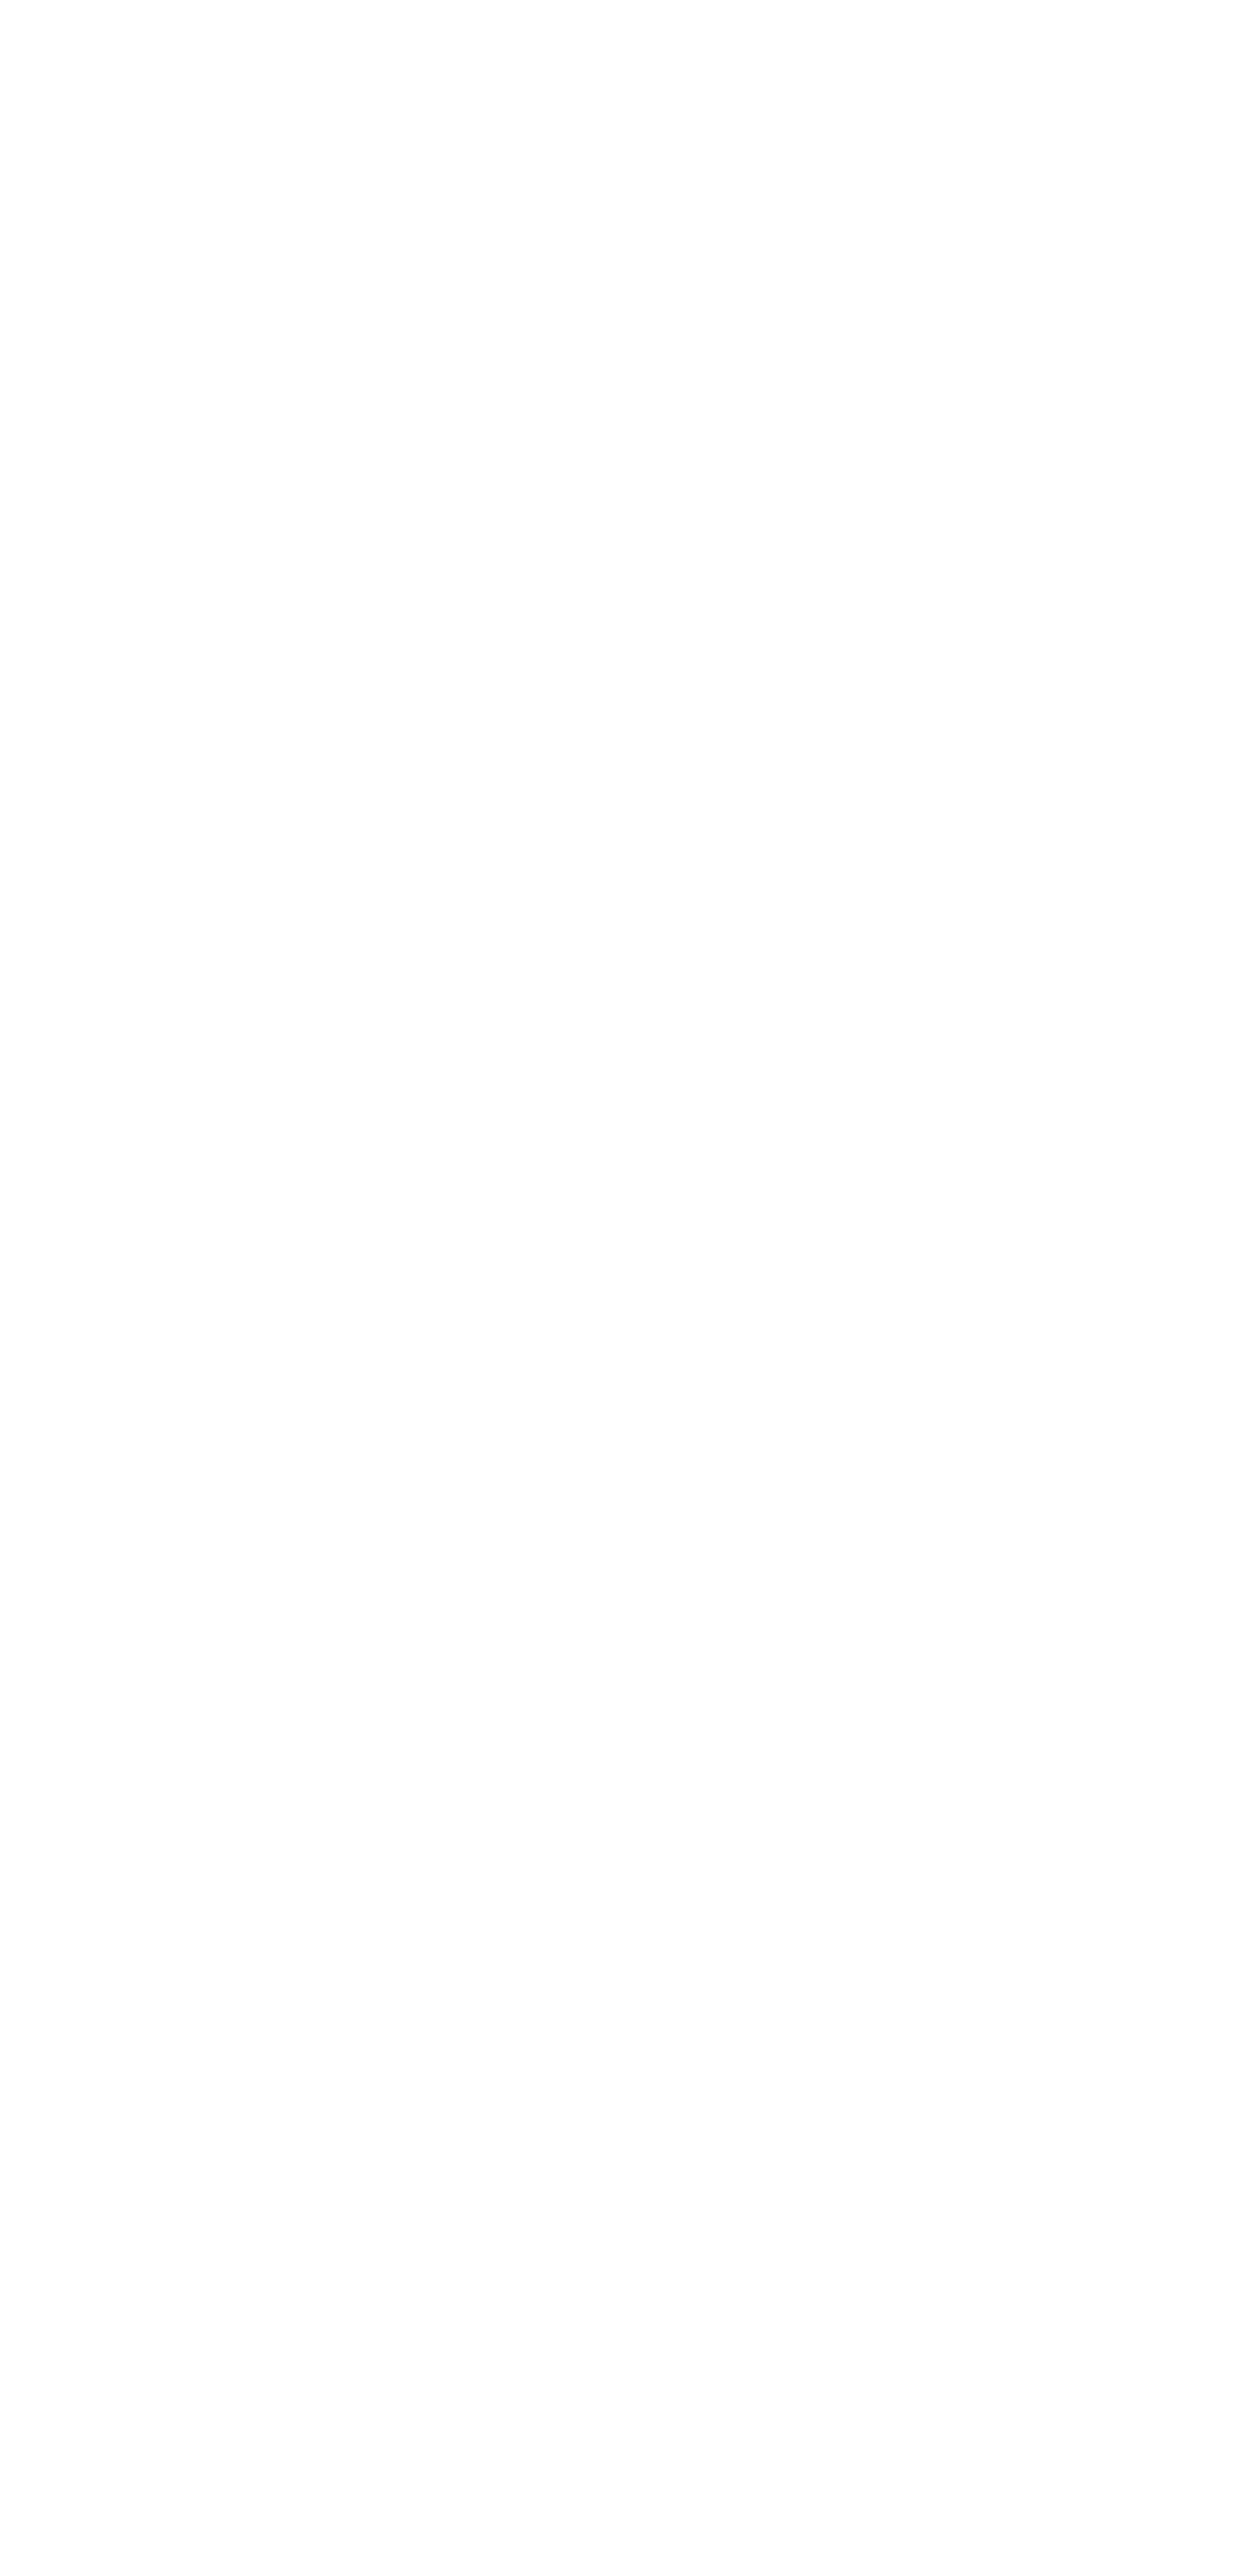

models/jupyter/e0b180/samples.png
models/jupyter/e0b235/samples.png
models/jupyter/e1b25/samples.png
models/jupyter/e1b80/samples.png
models/jupyter/e1b135/samples.png
models/jupyter/e1b190/samples.png
models/jupyter/e1b245/samples.png
models/jupyter/e2b30/samples.png
models/jupyter/e2b85/samples.png


KeyboardInterrupt: 

In [5]:
torch.cuda.empty_cache() #free some memory up
insights = Insights(len(dataloader), epochs, "jupyter")
insights.instantiateSaveFile(args)
start_time = time.time()
save_times = [(start_time + x*savefreq*60 + 60) for x in range(1000)]
curr_save = 0 #what save is the program on
final_saved = False

#TRAINING
for epoch in range(epochs):
    for i, batch in enumerate(iter(dataloader)):
        gan.forward(batch)
        gan.optimize_D()
        gan.optimize_G()
            
        torch.cuda.empty_cache() #free some memory up

        if i % 5 == 0:
            insights.get_sample(gan)
            insights.display_insights(gan, i, epoch)

            if save_times[curr_save] < time.time(): #save figures every checkpoint
                print("CheckPoint")
                curr_save += 1
                insights.save_figures(epoch, i, gan, setX, setY)

            if not final_saved and time.time() - start_time > 60*60*4 - 2*60: #save the model when the time limit is near
                insights.save_model(epoch, i, gan, setX, setY)
                final_saved = True

            torch.cuda.empty_cache()

    gan.step_lr() #adjust the learning rate every epoch

insights.save_model(epoch, i, gan, setX, setY) #save the model if training finishes before the time limit

In [ ]:
#DATASETS
dataset = Dataset(setA, setB)
tensors = dataset.__getitem__(0)

loader = dataset.get_loader(16, True)

for batch in iter(loader):
    print(batch[1].shape)
    A1 = batch[0][0]
    A2 = batch[0][1
    B1 = batch[1][0]
    B2 = batch[1][1]
    display_sample(A1, A2, B1, B2)

In [ ]:
#MODEL AND DEVICE
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
#DEBUG GENERATOR
generator = Generator(3, 3, 64)
generator.to(torch.device("cuda"))

print(generator)
print("RESNET IS ON: ", next(generator.model[10].blocks[0].parameters()).device)
print(list(generator.model[10].children()))
for i,m in enumerate(generator.model):
    print(i)
    try:
        print(next(m.parameters()).device)
    except StopIteration:
        continue
random_tensor = torch.randn(16, 3, 32, 32)
random_tensor = random_tensor.to(torch.device("cuda"))
    
result = generator.forward(random_tensor)